# Support Vector machines

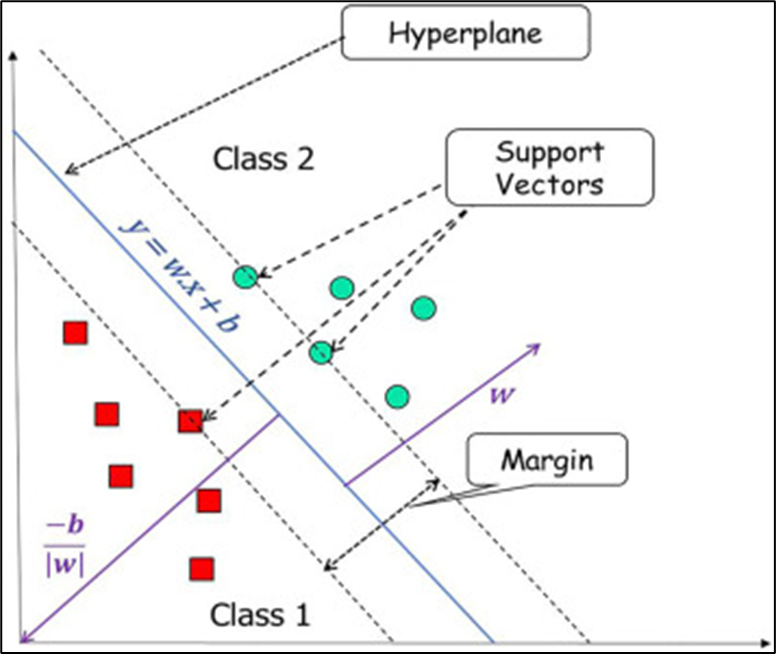

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Seperate X and Y

In [5]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Create the pre-processing pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train test split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [12]:
xtrain.shape

(100, 4)

In [13]:
xtest.shape

(50, 4)

### Create an SVM Model

In [14]:
from sklearn.svm import SVC 
model = SVC(probability=True)
model.fit(xtrain, ytrain)

SVC(probability=True)

In [15]:
model.score(xtrain, ytrain)

0.97

In [16]:
model.score(xtest, ytest)

0.92

### Predict results for train and test

In [17]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [18]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [19]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [20]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [21]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Create a confusion matrix for test data

In [22]:
c = model.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

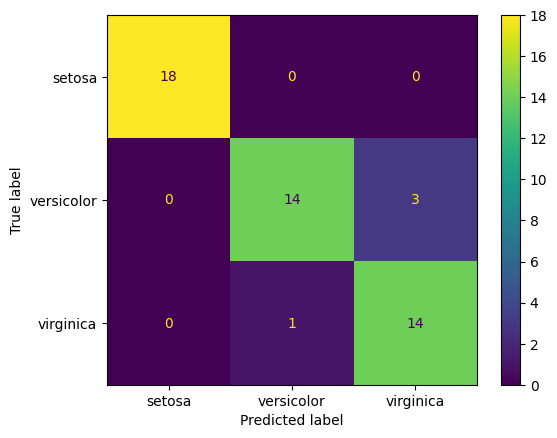

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Print the classification report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.87        17
   virginica       0.82      0.93      0.87        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



### Using SVM to predict out of sample data

In [25]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [26]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [27]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [28]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.00961327, 0.92540151, 0.06498521],
       [0.01010922, 0.01324181, 0.97664898],
       [0.0262636 , 0.94504809, 0.02868831],
       [0.61763389, 0.27469303, 0.10767308],
       [0.01396584, 0.23766623, 0.74836794],
       [0.94439915, 0.03196191, 0.02363895],
       [0.04127825, 0.94591939, 0.01280236],
       [0.00949762, 0.02911858, 0.96138379],
       [0.94947432, 0.02804758, 0.0224781 ],
       [0.75942022, 0.1764473 , 0.06413248],
       [0.01296878, 0.97127873, 0.01575249],
       [0.01483393, 0.95248015, 0.03268592],
       [0.01419251, 0.01318552, 0.97262196],
       [0.01902829, 0.67920525, 0.30176646],
       [0.01785863, 0.16070156, 0.82143981]])

In [29]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.92540151, 0.97664898, 0.94504809, 0.61763389, 0.74836794,
       0.94439915, 0.94591939, 0.96138379, 0.94947432, 0.75942022,
       0.97127873, 0.95248015, 0.97262196, 0.67920525, 0.82143981])

### Save above in xnew

In [30]:
xnew['species_pred'] = preds 
xnew['species_prob'] = max_probs

In [31]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_prob
0,5.5,2.5,4.0,1.3,versicolor,0.925402
1,6.9,3.1,5.1,2.3,virginica,0.976649
2,5.1,2.5,3.0,1.1,versicolor,0.945048
3,4.4,2.9,NaN,0.2,setosa,0.617634
4,5.9,3.0,5.1,1.8,virginica,0.748368
5,5.5,3.5,1.3,0.2,setosa,0.944399
6,5.6,NaN,3.6,1.3,versicolor,0.945919
7,6.5,3.0,5.2,2.0,virginica,0.961384
8,5.3,3.7,1.5,0.2,setosa,0.949474
9,5.1,3.4,1.5,NaN,setosa,0.759420


### Save above file to csv

In [32]:
xnew.to_csv('SVMResults.csv', index=False)